In [1]:
backend_url = 'http://localhost:8080'

In [8]:
import requests
import json

def get_tbr(payload={}):
    # payload parameters that are not provided are randomized
    response = requests.get(backend_url + '/find_tbr_model_sphere_with_firstwall', params=payload)
    return json.loads(response.content) if response.ok else None
    
get_tbr({'firstwall_thickness':2.42})

In [21]:
import numpy as np
frac1 = np.linspace(start=0., stop=1., num=10, endpoint=True).tolist()
frac2 = np.linspace(start=0., stop=1., num=10, endpoint=True).tolist()

# these dimensions are fixed except for the two above
payload = {
     'blanket_breeder_fraction': 0.5608069607610957,
     'blanket_breeder_li6_enrichment_fraction': 1.0,
     'blanket_breeder_material': 'Li2TiO3',
     'blanket_breeder_packing_fraction': 0.6888888888888889,
     'blanket_coolant_fraction': 0.07933240759730288,
     'blanket_coolant_material': 'H2O',
     'blanket_multiplier_fraction': 0.25066556953549524,
     'blanket_multiplier_material': 'Be',
     'blanket_multiplier_packing_fraction': 0.6444444444444444,
     'blanket_structural_fraction': 0.10919506210610634,
     'blanket_structural_material': 'SiC',
     'firstwall_armour_fraction': 0.30293194564831155,
     'firstwall_armour_material': 'tungsten',
     'firstwall_coolant_fraction': 0.3089151530760297,
     'firstwall_coolant_material': 'H2O',
     'firstwall_structural_fraction': 0.38815290127565866,
     'firstwall_structural_material': 'eurofer',
     'firstwall_thickness': 2.42,
     'number_of_batches': 10,
     'particles_per_batch': 10000
}

tbr = np.zeros((
    len(frac1), 
    len(frac2)))
tbr_error = np.zeros(tbr.shape)
max_attempts = 3
n_data_points = tbr.shape[0] * tbr.shape[1]
data_point_idx = 0

for i, f1 in enumerate(frac1):
    for j, f2 in enumerate(frac2):
        payload['firstwall_armour_fraction'] = f1
        payload['firstwall_coolant_fraction'] = f2
        payload['firstwall_structural_fraction'] = 1. - f1 - f2

        for n_attempt in range(max_attempts):
            print('[%.1f%%]\t Running %f,\t %f\t (attempt %d of %d)'
                  % (100 * data_point_idx / (n_data_points - 1), f1, f2, 
                     n_attempt + 1, max_attempts))
            result = get_tbr(payload)
            if result is not None:
                break
        
        if result is not None:
            tbr[i, j] = result['tbr']
            tbr_error[i, j] = result['tbr_error']
        else:
            tbr[i, j] = np.nan
            tbr_error[i, j] = np.nan
        data_point_idx += 1
        
print(tbr[0:5,0:5])

[0.0%]	 Running 0.000000,	 0.000000	 (attempt 1 of 3)
[1.0%]	 Running 0.000000,	 0.111111	 (attempt 1 of 3)
[2.0%]	 Running 0.000000,	 0.222222	 (attempt 1 of 3)
[3.0%]	 Running 0.000000,	 0.333333	 (attempt 1 of 3)
[4.0%]	 Running 0.000000,	 0.444444	 (attempt 1 of 3)
[5.1%]	 Running 0.000000,	 0.555556	 (attempt 1 of 3)
[6.1%]	 Running 0.000000,	 0.666667	 (attempt 1 of 3)
[7.1%]	 Running 0.000000,	 0.777778	 (attempt 1 of 3)
[8.1%]	 Running 0.000000,	 0.888889	 (attempt 1 of 3)
[9.1%]	 Running 0.000000,	 1.000000	 (attempt 1 of 3)
[10.1%]	 Running 0.111111,	 0.000000	 (attempt 1 of 3)
[11.1%]	 Running 0.111111,	 0.111111	 (attempt 1 of 3)
[12.1%]	 Running 0.111111,	 0.222222	 (attempt 1 of 3)
[13.1%]	 Running 0.111111,	 0.333333	 (attempt 1 of 3)
[14.1%]	 Running 0.111111,	 0.444444	 (attempt 1 of 3)
[15.2%]	 Running 0.111111,	 0.555556	 (attempt 1 of 3)
[16.2%]	 Running 0.111111,	 0.666667	 (attempt 1 of 3)
[17.2%]	 Running 0.111111,	 0.777778	 (attempt 1 of 3)
[18.2%]	 Running 0.1

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

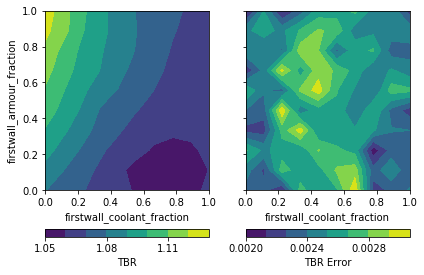

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

pl1 = ax1.contourf(frac2, frac1, tbr)
ax1.set_xlabel('firstwall_coolant_fraction')
ax1.set_ylabel('firstwall_armour_fraction')
cb1 = fig.colorbar(pl1, orientation='horizontal', label='TBR', ax=ax1)
cb1.ax.locator_params(nbins=3)

pl2 = ax2.contourf(frac2, frac1, tbr_error)
ax2.set_xlabel('firstwall_coolant_fraction')
cb2 = fig.colorbar(pl2, orientation='horizontal', label='TBR Error', ax=ax2)
cb2.ax.locator_params(nbins=3)

plt.tight_layout()